In [2]:
# Import necessary libraries for data processing, visualization, and sentiment analysis
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Function to load and validate the tweet dataset
def fetch_tweet_data(file_location):
    try:
        tweet_df = pd.read_csv(file_location, low_memory=False)
        print(f"Dataset loaded successfully. Total rows: {len(tweet_df)}")
        return tweet_df
    except FileNotFoundError:
        print(f"Error: Could not find file at {file_location}")
        return None
    except Exception as err:
        print(f"Unexpected error while loading data: {err}")
        return None

# Define dataset path and load data
data_path = "Data/Bitcoin_tweets.csv"
tweets_df = fetch_tweet_data(data_path)
if tweets_df is not None:
    display(tweets_df.head())

Dataset loaded successfully. Total rows: 48583


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [4]:
# Preprocess dataset
def preprocess_tweets(dataframe):
    if dataframe is None:
        print("Error: No data to preprocess.")
        return None
    # Keep only tweets with hashtags and select 'text' and 'date'
    processed_df = dataframe[dataframe['hashtags'].notnull()][['text', 'date']].copy()
    processed_df.columns = ['tweet_content', 'timestamp']
    print(f"Filtered dataset size: {len(processed_df)}")
    return processed_df

# Apply preprocessing
tweets_df = preprocess_tweets(tweets_df)
if tweets_df is not None:
    display(tweets_df.head())

Filtered dataset size: 38416


,tweet_content,timestamp
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,2021-02-10 23:53:30


In [5]:
# Clean tweet text for sentiment analysis
def sanitize_text(text):
    if not isinstance(text, str):
        return ""
    # Normalize Bitcoin-related terms
    text = re.sub(r"#(?:bitcoin|BTC)\b", "bitcoin", text, flags=re.IGNORECASE)
    # Remove unwanted elements
    text = re.sub(r"@\w+", "", text)  # Remove user mentions
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text)  # Normalize whitespace
    return text.strip().lower()

# Apply text cleaning
if tweets_df is not None:
    tweets_df['processed_text'] = tweets_df['tweet_content'].apply(sanitize_text)
    display(tweets_df.head())

,tweet_content,timestamp,processed_text
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after bi...
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,today thats this thursday we will do a take 2 ...
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,btc a big chance in a billion price 48726440 2...
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,2021-02-10 23:53:30,trade crypto on binance enjoy cashback 10 of t...


In [6]:
# Calculate sentiment metrics using TextBlob
def compute_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return 0.0

def compute_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0

def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    return "Neutral"

# Add sentiment columns
if tweets_df is not None:
    tweets_df['subjectivity_score'] = tweets_df['processed_text'].apply(compute_subjectivity)
    tweets_df['polarity_score'] = tweets_df['processed_text'].apply(compute_polarity)
    tweets_df['sentiment_label'] = tweets_df['polarity_score'].apply(classify_sentiment)
    display(tweets_df.head())

,tweet_content,timestamp,processed_text,subjectivity_score,polarity_score,sentiment_label
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after bi...,0.1,0.00,Neutral
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,today thats this thursday we will do a take 2 ...,0.0,0.00,Neutral
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,btc a big chance in a billion price 48726440 2...,0.1,0.00,Neutral
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,0.2,-0.25,Negative
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,2021-02-10 23:53:30,trade crypto on binance enjoy cashback 10 of t...,0.5,0.40,Positive


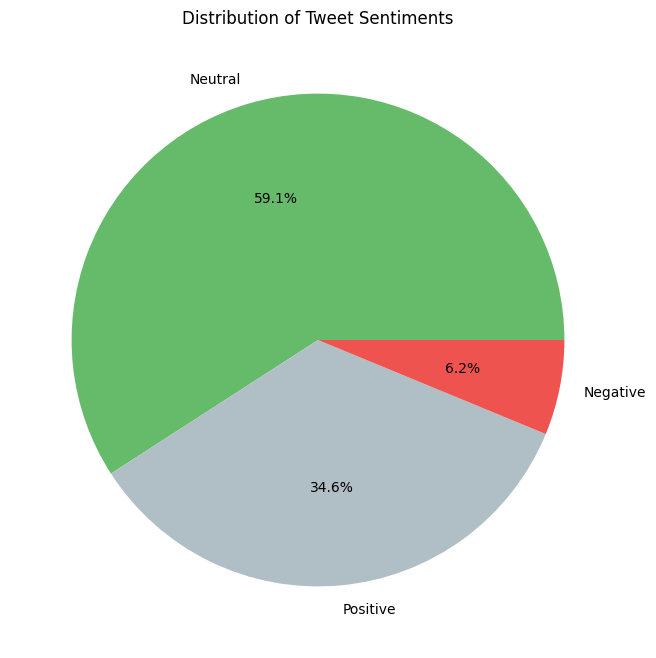

In [7]:
# sentiment distribution as a pie chart
def plot_sentiment_pie(dataframe):
    if dataframe is None or 'sentiment_label' not in dataframe.columns:
        print("Error: Sentiment data unavailable.")
        return
    plt.figure(figsize=(8, 8))
    sentiment_counts = dataframe['sentiment_label'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66BB6A', '#B0BEC5', '#EF5350'])
    plt.title('Distribution of Tweet Sentiments')
    plt.savefig('sentiment_pie_chart.png')
    plt.show()

if tweets_df is not None:
    plot_sentiment_pie(tweets_df)

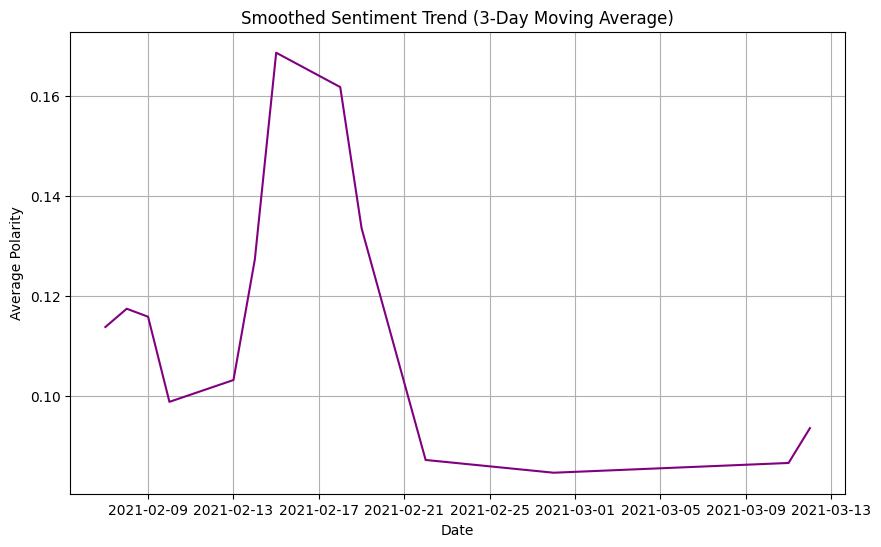

In [9]:
# Plot average sentiment over time
def plot_sentiment_timeseries(dataframe):
    if dataframe is None or 'timestamp' not in dataframe.columns or 'polarity_score' not in dataframe.columns:
        print("Error: Required data for time-series plot missing.")
        return
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], errors='coerce')  # Handle invalid dates
    daily_sentiment = dataframe.groupby(dataframe['timestamp'].dt.date)['polarity_score'].mean().rolling(window=3).mean()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=daily_sentiment.index, y=daily_sentiment.values, color='purple')
    plt.title('Smoothed Sentiment Trend (3-Day Moving Average)')
    plt.xlabel('Date')
    plt.ylabel('Average Polarity')
    plt.grid(True)
    plt.savefig('sentiment_timeseries.png')
    plt.show()

if tweets_df is not None:
    plot_sentiment_timeseries(tweets_df)

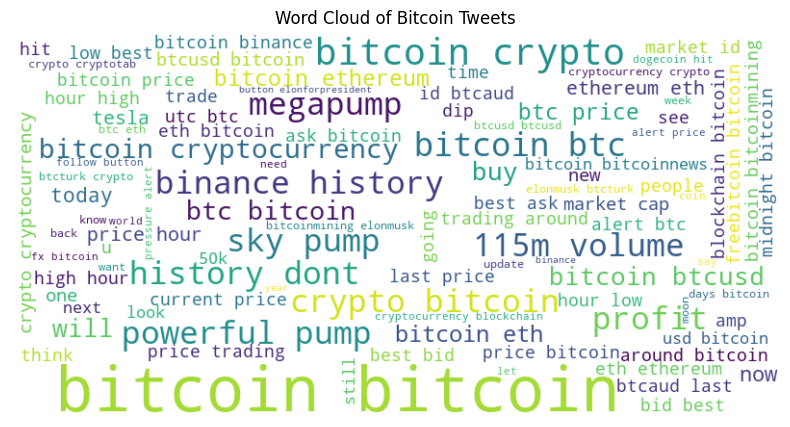

In [10]:
# Create a word cloud of frequent terms
def generate_wordcloud(dataframe):
    if dataframe is None or 'processed_text' not in dataframe.columns:
        print("Error: Text data unavailable for word cloud.")
        return
    text = " ".join(dataframe['processed_text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Bitcoin Tweets')
    plt.savefig('tweet_wordcloud.png')
    plt.show()

if tweets_df is not None:
    generate_wordcloud(tweets_df)

In [11]:
# Display summary statistics
def show_summary_stats(dataframe):
    if dataframe is None:
        print("Error: No data for summary.")
        return
    print("Sentiment Distribution:")
    print(dataframe['sentiment_label'].value_counts())
    print("\nAverage Polarity:", dataframe['polarity_score'].mean())
    print("Average Subjectivity:", dataframe['subjectivity_score'].mean())

if tweets_df is not None:
    show_summary_stats(tweets_df)

Sentiment Distribution:
sentiment_label
Neutral     22711
Positive    13311
Negative     2394
Name: count, dtype: int64

Average Polarity: 0.11802827789574548
Average Subjectivity: 0.29638877374238576
